**Created by Gael AHOUANVOEDO**

**🚀 Students Performance 📊 Kaggle 📈**

**22 Mai 2022**

# **<center><span style="color:#fd7b12;">🚀 STUDENTS PERFORMANCE 🚀   </span></center>**
## <center>Pour plus d'informations contctez moi sur LinkedIn 👍</center>

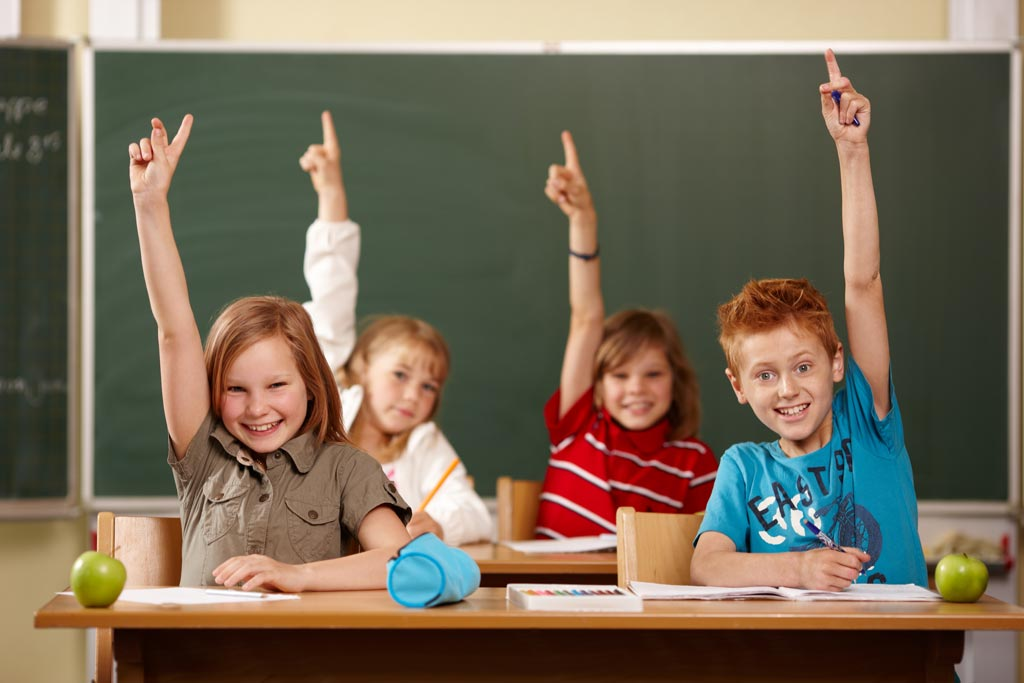

# **<span style="color:#fd7b12;">Table of Contents  </span>**
<a id="toc"></a>
- [1. Introduction](#1)
- [2. Imports](#2)
- [3. Data Wrangling](#3)
- [4. Exploratory Data Analyse](#4)
- [5. Prediction](#5)
- [6. Conclusion](#6)

<a id="1"></a>
# **<center><span style="color:#fd7b12;">Introduction  </span></center>**

### Dans ce projet, je suis emmené à exploiter un dataset sur les performances des élèves d'une école et créé un modèle de prédiction qui puisse prédire si un étudiant inscritréussirait ou pas

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="2"></a>
# **<center><span style="color:#fd7b12;">Imports  </span></center>**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="3"></a>
# **<center><span style="color:#fd7b12;"> Data Wrangling </span></center>**

In [2]:
data= pd.read_csv('student_data.csv')
df = data.copy()

In [3]:
df.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
85,GP,F,15,U,GT3,T,4,4,services,services,...,4,4,4,2,3,5,6,7,9,8
273,GP,M,17,R,GT3,T,1,2,at_home,at_home,...,3,5,2,2,2,1,2,15,14,14
246,GP,M,17,U,GT3,T,2,3,other,other,...,5,2,2,1,1,2,4,12,12,13
201,GP,F,16,U,GT3,T,2,3,other,other,...,4,4,3,1,3,4,6,8,10,10
260,GP,F,18,U,GT3,T,4,3,services,other,...,3,1,2,1,3,2,21,17,18,18


### Tout d'abord, nous examinons le nombre de lignes et de colonnes que nous avons

In [4]:
df.shape

(395, 33)

### Et qu'en est-il des valeurs manquantes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### Il semble que nous n'ayons aucune valeur manquante, nous pouvons le vérifier avec une autre fonction

In [6]:
df.isnull().sum().sum()

0

### Ok pas de valeurs manquantes. Nous pouvons observer les variables pour identifier les différents problèmes de qualité des données

In [7]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

### Nous ne devrions avoir que deux sexes : masculin ou féminin afin de pouvoir vérifier combien de valeurs uniques nous avons

In [8]:
df.sex.nunique()

2

### Vu qu'on étudie des étudiants, je pense qu'on peut avoir maximum 25 ans commme age. Toute valeur supérieur pourrait être une erreur de saisie

In [9]:
df.age.max()

22

### Super!!! L'éducation de la mère et l'éducation du père doivent avoir le même groupe de classification

In [10]:
df.Medu.unique()

array([4, 1, 3, 2, 0], dtype=int64)

In [11]:
df.Fedu.unique()

array([4, 1, 2, 3, 0], dtype=int64)

### Nous allons maintenant créer une nouvelle variable qui correspond aux notes d'examen

In [12]:
df['exam'] = (df['G1']+df['G2']+df['G3'])/3

### Une autre pour le verdict de l'examen

In [13]:
df['verdict'] =0

In [14]:
for i in  df['exam'].index:
    if df['exam'][i] >=10:
        df['verdict'][i] =1;
    else:
        df['verdict'][i] = 0;

In [15]:
df.verdict.unique()

array([0, 1], dtype=int64)

### Nous n'avons aucune information sur de nombreuses variables. Nous les supprimerons tous

In [16]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'exam', 'verdict'],
      dtype='object')

In [17]:
df.drop(['address', 'Pstatus','reason',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout','Dalc',
       'Walc'], axis =1, inplace=True)

In [18]:
df.to_csv('dataset.csv')

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4"></a>
# **<center><span style="color:#fd7b12;"> Exploratory Data Analysis </span></center>**

### Définir des valeurs de style pour toutes nos visualisations

In [19]:
sns.set_context("talk")
sns.set_style("whitegrid")
colors = sns.color_palette('tab10')

## School

In [20]:
df.school.nunique()

2

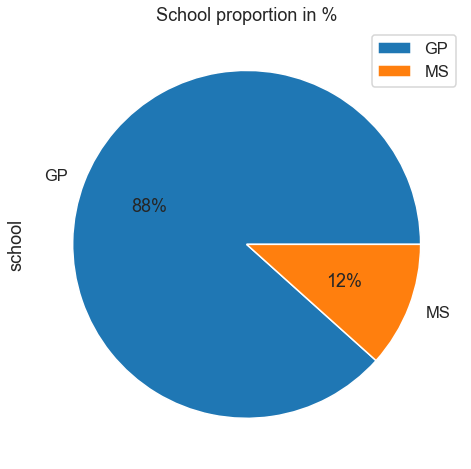

In [21]:
plt.figure(figsize=(10,8))
df.school.value_counts().plot(kind='pie', autopct='%.0f%%', colors = colors,)
plt.title('School proportion in %')
plt.legend()

> ### Nous avons une dominance de GP School avec 88% soit 22/25 school

## Sex

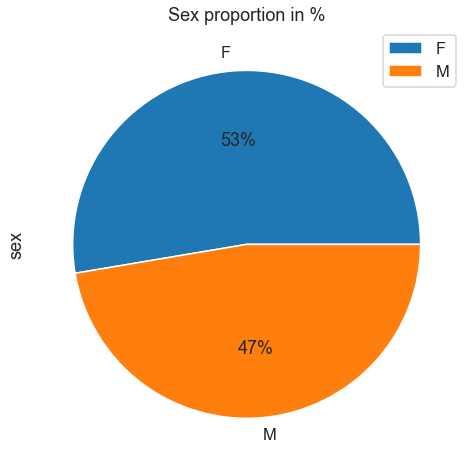

In [22]:
plt.figure(figsize=(10,8))
df.sex.value_counts().plot(kind='pie', autopct='%.0f%%', colors = colors)
plt.title('Sex proportion in %')
plt.legend()

> ### Nous avons une légère domination de femme.

## Age

Text(0.5, 1.0, 'Age Distribution')

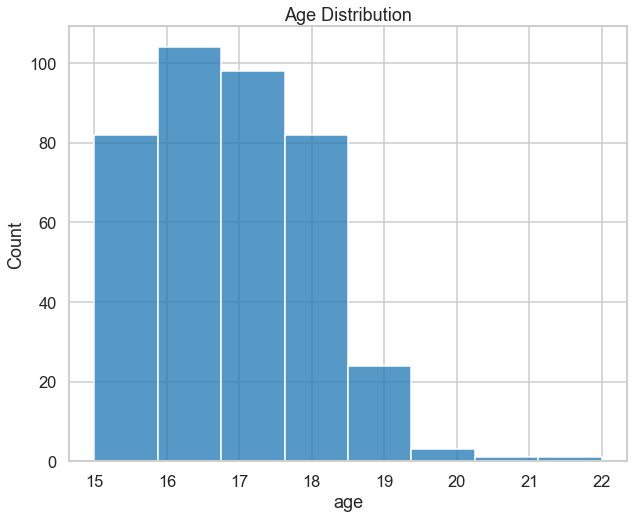

In [23]:
plt.figure(figsize=(10,8))
sns.histplot(data = df, x='age', bins=8, palette = colors)
plt.title('Age Distribution')

> ### Nos élèves sont jeunes, entre 15 et 18 ans, Nous avons aussi quelques un agés.

## Famsize

Text(0.5, 1.0, 'Size of family')

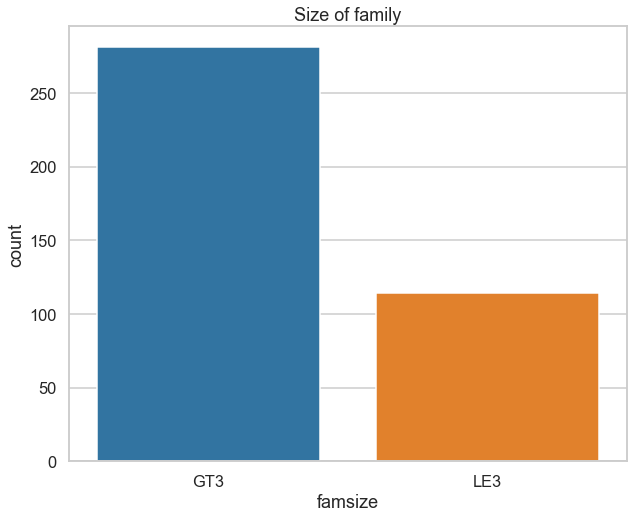

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(data = df, x='famsize', palette = colors, order = df.famsize.value_counts().index)
plt.title('Size of family')

> ### Nous avons plus d'étudiants avec plus de 3 membres dans leur familles

## Parents Educations

Text(0.5, 1.0, 'Father Education')

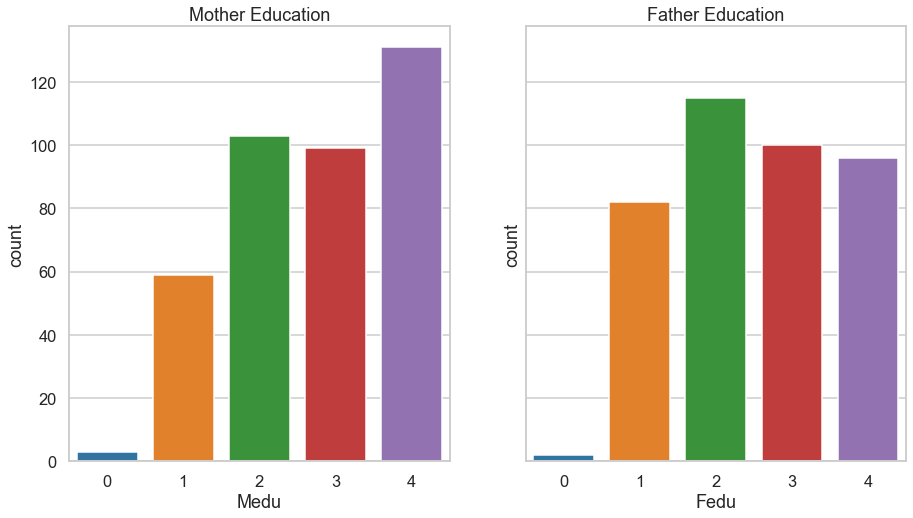

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8),sharey=True)

# Medu
sns.countplot(ax=axes[0], data = df, x='Medu', palette = colors)
axes[0].set_title('Mother Education')

# Fedu
sns.countplot(ax=axes[1], data = df, x='Fedu', palette = colors)
axes[1].set_title('Father Education')

> ### La plupart des mères ont un niveau d'instruction supérieur et la plupart des pères ont un niveau d'instruction moyen. Que ce soit les mères ou les pères, ils sont peu nombreux à avoir un niveau d'instruction 0.

## Parents Job

Text(0.5, 1.0, 'Father Job')

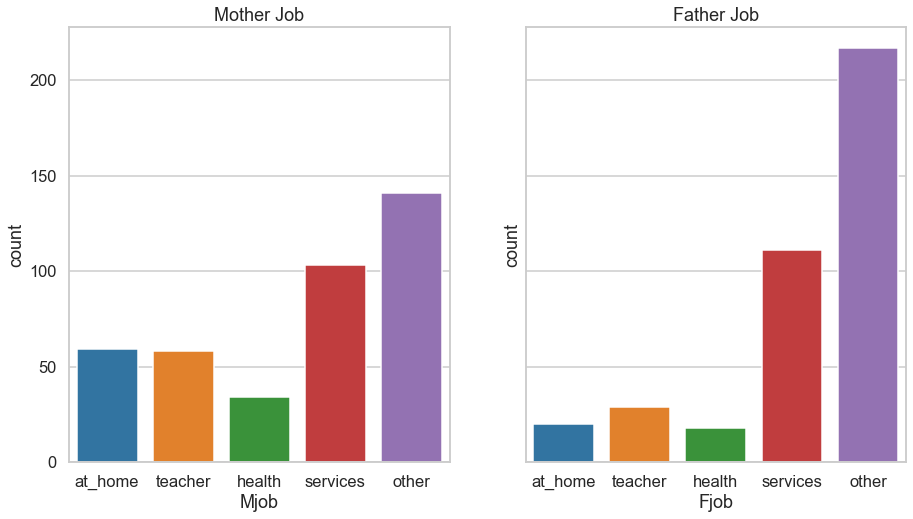

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
order2 = ['at_home','teacher','health','services','other']

# Mjob
sns.countplot(ax=axes[0], data = df, x='Mjob', palette = colors, order=order2)
axes[0].set_title('Mother Job')

# Fjob
sns.countplot(ax=axes[1], data = df, x='Fjob', palette = colors, order=order2)
axes[1].set_title('Father Job')

> ### La plupart des mères travail dans la fonction et les pères dans autres métiers.

## Guardian

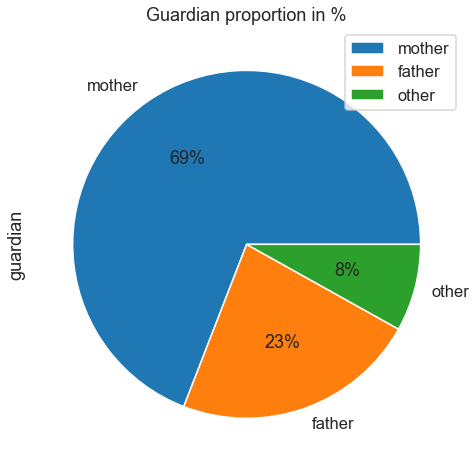

In [27]:
plt.figure(figsize=(10,8))
df.guardian.value_counts().plot(kind='pie', autopct='%.0f%%', colors = colors,)
plt.title('Guardian proportion in %')
plt.legend()

> ### Dans 69% des cas, c'est la mère qui est la tutrice soit 7 fois sur 10

## Travel/Study time

Text(0.5, 1.0, 'Study time')

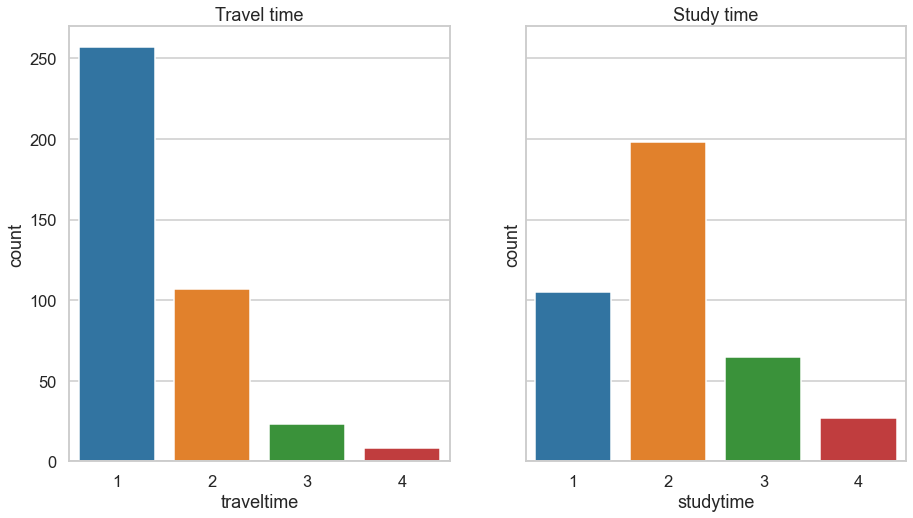

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
order2 = [1,2,3,4]

# Mjob
sns.countplot(ax=axes[0], data = df, x='traveltime', palette = colors, order=order2)
axes[0].set_title('Travel time')

# Fjob
sns.countplot(ax=axes[1], data = df, x='studytime', palette = colors, order=order2)
axes[1].set_title('Study time')

> ### Les étudiants de notre jeu de données sont très souvent près de l'école et ont souvent un temps d'étude moyen

## Health

Text(0.5, 1.0, 'Health')

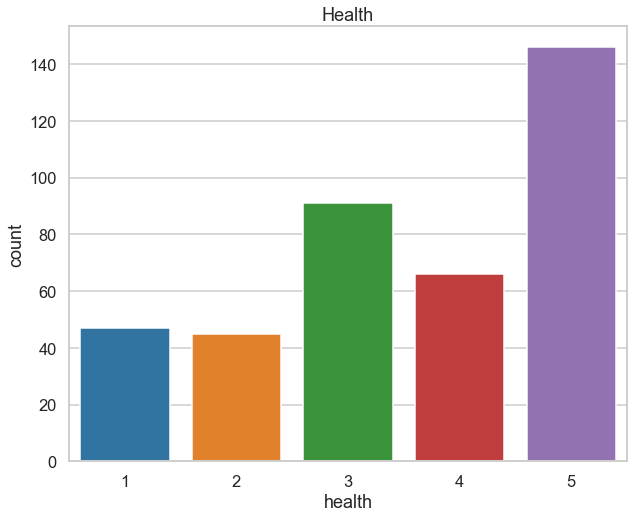

In [29]:
plt.figure(figsize=(10,8))
sns.countplot(data = df, x='health', palette = colors)
plt.title('Health')

> ### La plupart de nos étudiants sont en bonne santé

## Absences

Text(0.5, 1.0, 'Absences Distributiion')

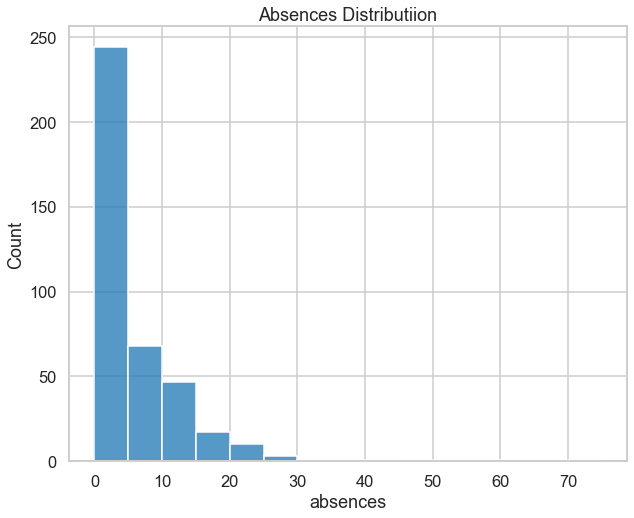

In [30]:
plt.figure(figsize=(10,8))
sns.histplot(data = df, x='absences', bins=15, palette = colors)
plt.title('Absences Distributiion')

In [31]:
df.query('absences > 30')

,school,sex,age,famsize,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,health,absences,G1,G2,G3,exam,verdict
74,GP,F,16,GT3,3,3,other,services,mother,1,2,5,54,11,12,11,11.333333,1
183,GP,F,17,LE3,3,3,other,other,mother,1,2,1,56,9,9,8,8.666667,0
276,GP,F,18,GT3,3,2,other,services,mother,2,2,5,75,10,9,9,9.333333,0
307,GP,M,19,GT3,4,4,teacher,services,other,2,1,4,38,8,9,8,8.333333,0
315,GP,F,19,GT3,2,3,other,other,other,1,3,3,40,13,11,11,11.666667,1


> ### Les élèves sont un peu en retard. Mais nous avons 5 élèves, qui sont plus en retard que d'habitude. Mais bizarement deux d'entre eux ont réussi

## Grades

Text(0.5, 1.0, 'Grade 3 Distribution')

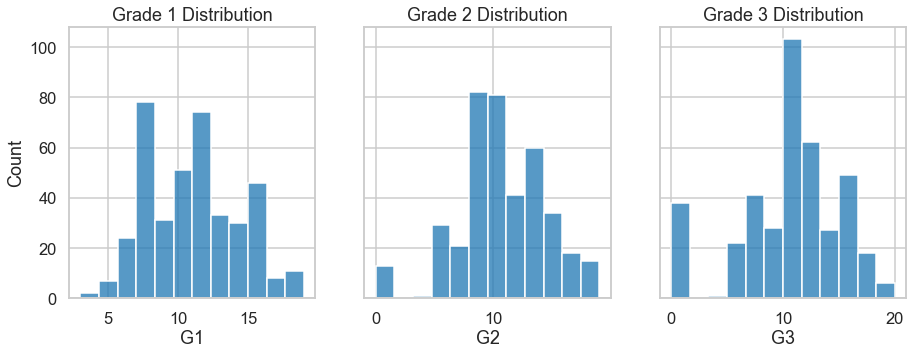

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(15,5),sharey=True)

# G1
sns.histplot(ax=axes[0], data = df, x='G1', palette = colors, bins = 12)
axes[0].set_title('Grade 1 Distribution')

# G2
sns.histplot(ax=axes[1], data = df, x='G2', palette = colors, bins = 12)
axes[1].set_title('Grade 2 Distribution')

# G3
sns.histplot(ax=axes[2], data = df, x='G3', palette = colors, bins = 12)
axes[2].set_title('Grade 3 Distribution')

> ### Les élèves réussissent mieux les matières 1 et 3. Pour les matières 2 et 3, nous avons des élèves qui ont de très mauvais résultats.

## Exam

Text(0.5, 1.0, 'Exam Distribution')

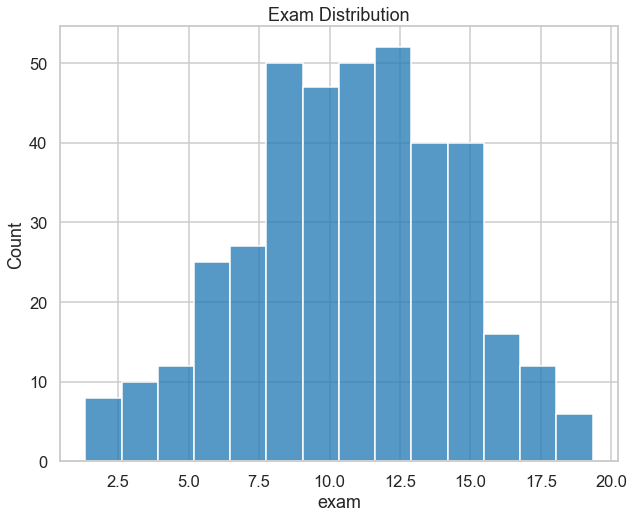

In [33]:
plt.figure(figsize=(10,8))
sns.histplot(data = df, x='exam', palette = colors)
plt.title('Exam Distribution')

## Verdict

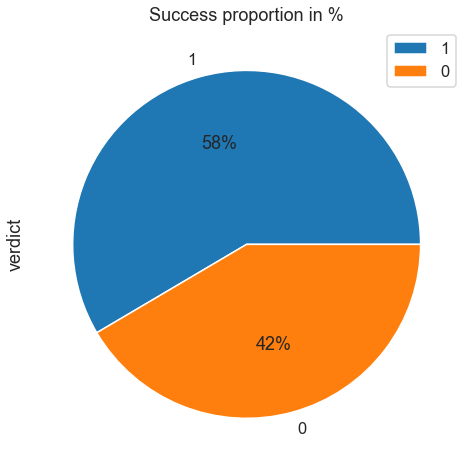

In [34]:
plt.figure(figsize=(10,8))
df.verdict.value_counts().plot(kind='pie', autopct='%.0f%%', colors = colors)
plt.title('Success proportion in %')
plt.legend()

> ### En observant la répartition, on constate que l'on a plus de réussite que d'échec à l'examen. 58% réussissent et 42% échouent.

In [35]:
df.columns

Index(['school', 'sex', 'age', 'famsize', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'guardian', 'traveltime', 'studytime', 'health', 'absences', 'G1', 'G2',
       'G3', 'exam', 'verdict'],
      dtype='object')

## Heatmap

Text(0.5, 1.0, 'Map of correlations')

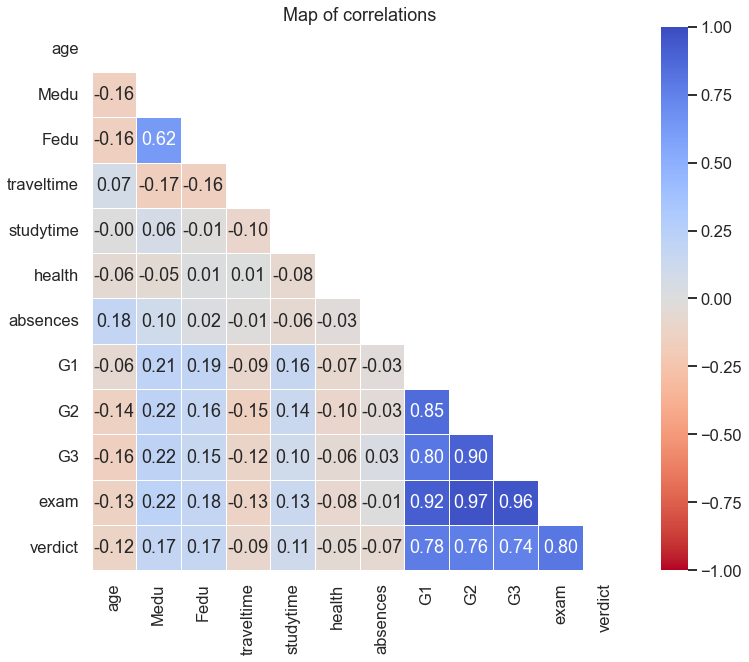

In [36]:
plt.figure(figsize = (12,10))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, center=0, cmap='coolwarm_r', linewidths=1, annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.title('Map of correlations')

### Faisons une étude sur la réussite des étudiants

In [37]:
df_success = df.query('verdict==1')
df_success.sample(3)

,school,sex,age,famsize,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,health,absences,G1,G2,G3,exam,verdict
295,GP,M,17,GT3,3,3,health,other,mother,1,1,5,4,14,12,11,12.333333,1
151,GP,M,16,LE3,2,1,at_home,other,mother,1,1,5,6,12,13,14,13.000000,1
215,GP,F,17,LE3,3,2,other,other,mother,2,2,1,2,14,15,15,14.666667,1


In [38]:
df_success.describe(include='all')

,school,sex,age,famsize,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,health,absences,G1,G2,G3,exam,verdict
count,231,231,231.000000,231,231.000000,231.000000,231,231,231,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.0
unique,2,2,NaN,2,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,M,NaN,GT3,NaN,NaN,other,other,mother,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,205,121,NaN,159,NaN,NaN,76,121,159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.567100,NaN,2.909091,2.675325,NaN,NaN,NaN,1.393939,2.112554,3.493506,5.251082,13.082251,13.129870,13.281385,13.164502,1.0
std,NaN,NaN,1.209941,NaN,1.065447,1.068622,NaN,NaN,NaN,0.622588,0.872462,1.438206,6.627819,2.384221,2.297545,2.430521,2.258825,0.0
min,NaN,NaN,15.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.000000,8.000000,9.000000,9.000000,10.000000,1.0
25%,NaN,NaN,16.000000,NaN,2.000000,2.000000,NaN,NaN,NaN,1.000000,2.000000,2.500000,0.000000,11.000000,11.000000,11.000000,11.333333,1.0
50%,NaN,NaN,16.000000,NaN,3.000000,3.000000,NaN,NaN,NaN,1.000000,2.000000,4.000000,4.000000,13.000000,13.000000,13.000000,12.666667,1.0
75%,NaN,NaN,17.000000,NaN,4.000000,4.000000,NaN,NaN,NaN,2.000000,3.000000,5.000000,8.000000,15.000000,15.000000,15.000000,14.666667,1.0


### `La première chose à analyser est de savoir si les homme ont plus de chances de réussir que la femme`

### Nous déterminons donc la proportion de réussite pour chaque sexe

In [39]:
df_Msex = df.query('sex=="M"').sample(187)

In [40]:
df_Fsex = df.query('sex=="F"').sample(187)

In [41]:
df_sex = df_Msex.append(df_Fsex)

Text(0.5, 1.0, 'Women students success %')

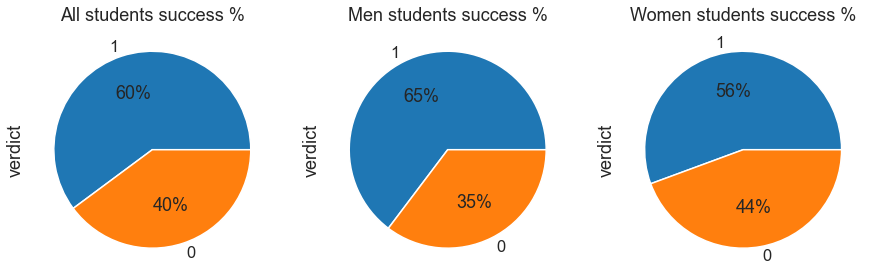

In [42]:
fig, axes = plt.subplots(1,3, figsize=(15,8))

#sex
df_sex.verdict.value_counts().plot(ax=axes[0],kind='pie',colors=colors, autopct='%.0f%%')
axes[0].set_title('All students success %')

#Msex
df_Msex.verdict.value_counts().plot(ax=axes[1], kind='pie',colors=colors, autopct='%.0f%%')
axes[1].set_title('Men students success %')

#Fex
df_Fsex.verdict.value_counts().plot(ax=axes[2], kind='pie',colors=colors, autopct='%.0f%%')
axes[2].set_title('Women students success %')

> ### On observe que les hommes réussissent plus que les femmes à l'examen, 65% contre 52%

### Nous pouvons également déterminer la probabilité des hommes et des femmes de réussir

In [43]:
print(f'La probabilité qu\'une personne réussisse et s\'il s\'agit d\'un homme est : {df.verdict.mean()*df_Msex.verdict.mean()}')
print(f'La probabilité qu\'une personne réussisse et s\'il s\'agit d\'une femme est: {df.verdict.mean()*df_Fsex.verdict.mean()}')

La probabilité qu'une personne réussisse et s'il s'agit d'un homme est : 0.3784065524944155
La probabilité qu'une personne réussisse et s'il s'agit d'une femme est: 0.3252419955323902


> ### Ici aussi on peut observer que les hommes ont plus de probabilité de réussir que les femmes, 0,37 contre 0,30

### Enfin je vais faire un test de statistiques (t-test) avec :
- Ho = Les hommes et les femmes ont les mêmes chances de réussir
- H1 = Les hommes ont plus de chances de réussir que les femmes

In [44]:
stats.ttest_ind(df_Msex.verdict, df_Fsex.verdict)

Ttest_indResult(statistic=1.798523083260424, pvalue=0.07290469214756969)

> ### La p-valeur est inférieure à 0,05 donc on peut rejeter l'hypothèse nulle. Donc les hommes ont plus de chances de réussir que les femmes

### `Maintenant, nous allons déterminer l'impact de l'âge pour réussir`

Text(0.5, 1.0, 'Age influence to exam score')

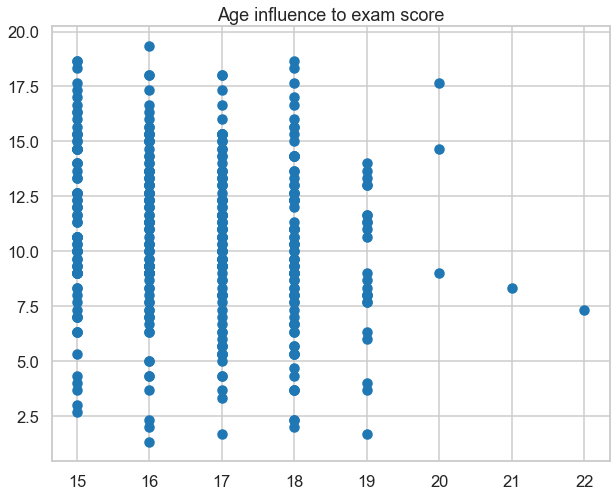

In [45]:
plt.figure(figsize=(10,8))
plt.scatter( x=df.age, y=df.exam)
plt.title('Age influence to exam score')

In [46]:
df_age_exam1 = pd.DataFrame([df.query('age==15').exam.mean(),df.query('age==16').exam.mean(),
                            df.query('age==17').exam.mean(),df.query('age==18').exam.mean(),
                            df.query('age==19').exam.mean(),df.query('age==20').exam.mean(),
                            df.query('age==21').exam.mean(),df.query('age==22').exam.mean(),
                            ],columns=['mscore'],index=[15,16,17,18,19,20,21,22])


df_age_exam2 = pd.DataFrame([df.query('age==15').exam.median(),df.query('age==16').exam.median(),
                            df.query('age==17').exam.median(),df.query('age==18').exam.median(),
                            df.query('age==19').exam.median(),df.query('age==20').exam.median(),
                            df.query('age==21').exam.median(),df.query('age==22').exam.median(),
                            ],columns=['mscore'],index=[15,16,17,18,19,20,21,22])

Text(0.5, 0, 'Age')

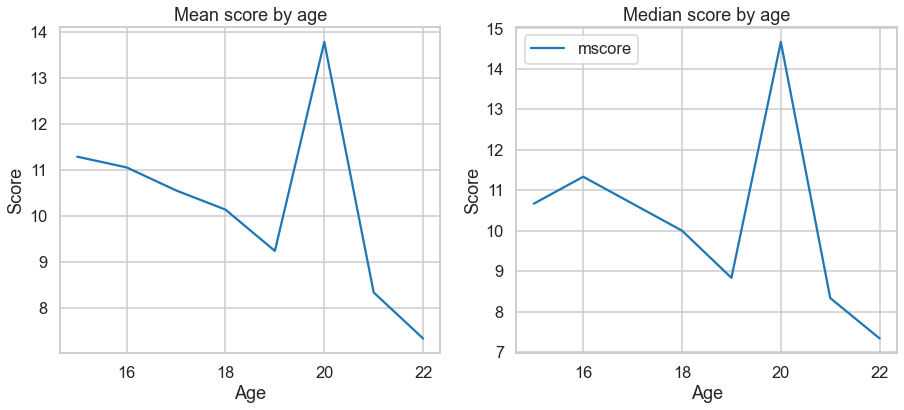

In [47]:
fig, axes =plt.subplots(1,2, figsize=([15,6]))

#mean
df_age_exam1.mscore.plot(ax=axes[0])
axes[0].set_title('Mean score by age')

axes[0].set_ylabel('Score')
axes[0].set_xlabel('Age')

#median
df_age_exam2.plot(ax=axes[1])
axes[1].set_title('Median score by age')
axes[1].set_ylabel('Score')
axes[1].set_xlabel('Age')

> ### Peu importe la mesure de centre que nous prenons, nous pouvons observer que le score diminue de 14 à 19 ans, fait le pic le plus élevé à 20 et diminue à nouveau après 20. Faisons donc une étude de proportion où nous ne considérons pas les trois élèves qui ont 20,21 et 22 ans. Ils ne sont que 5 pour 385 élèves

Text(0.5, 0, 'Age')

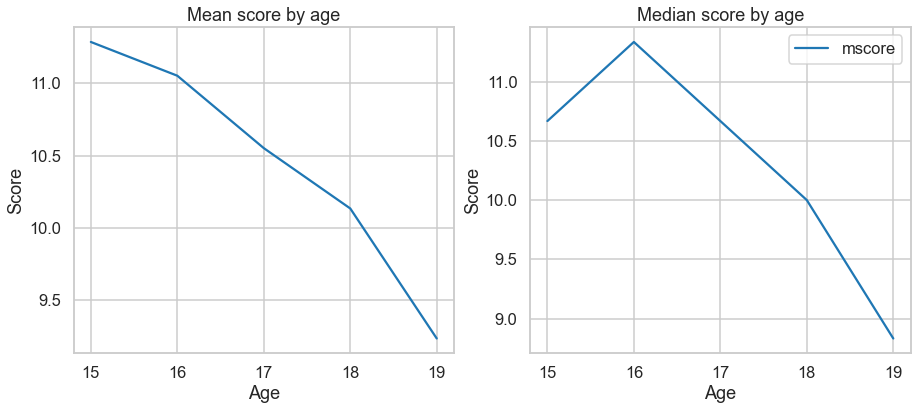

In [48]:
df_age_exam1 = pd.DataFrame([df.query('age==15').exam.mean(),df.query('age==16').exam.mean(),
                            df.query('age==17').exam.mean(),df.query('age==18').exam.mean(),
                            df.query('age==19').exam.mean()
                            ],columns=['mscore'],index=[15,16,17,18,19])


df_age_exam2 = pd.DataFrame([df.query('age==15').exam.median(),df.query('age==16').exam.median(),
                            df.query('age==17').exam.median(),df.query('age==18').exam.median(),
                            df.query('age==19').exam.median()
                            ],columns=['mscore'],index=[15,16,17,18,19])

fig, axes =plt.subplots(1,2, figsize=([15,6]))

#mean
df_age_exam1.mscore.plot(ax=axes[0])
axes[0].set_title('Mean score by age')
axes[0].set_ylabel('Score')
axes[0].set_xlabel('Age')

#median
df_age_exam2.plot(ax=axes[1])
axes[1].set_title('Median score by age')
axes[1].set_ylabel('Score')
axes[1].set_xlabel('Age')

> ### Ici, nous avons une courbe descendante. On peut donc dire que le score diminue avec l'âge des élèves.

### Maintenant, nous allons calculer la probabilité que quelqu'un réussisse si il est jeune ou agé. Les jeunes étudiants considèrent avoir entre 15 et 18 ans et les anciens étudiants plus de 18 ans

In [49]:
df_young = []
df_old = []

In [50]:
for i in df.index:
    if df['age'][i]<19:
        df_young.append(df['verdict'][i])
    else :
        df_old.append(df['verdict'][i])

In [51]:
df_young = pd.DataFrame(df_young, columns=['verdict'])
df_old = pd.DataFrame(df_old, columns=['verdict'])

In [52]:
df_old.shape[0]

29

In [53]:
for i in range(1,4):
    df_old = df_old.append(df_old)

In [54]:
df_old.shape[0]

232

In [55]:
print(f'La probabilité qu\'une personne réussisse et si elle est jeune est : {df.verdict.mean()*df_young.verdict.mean()}')
print(f'La probabilité qu\'une personne réussisse et s\'il est âgé est : {df.verdict.mean()*df_old.verdict.mean()}')

La probabilité qu'une personne réussisse et si elle est jeune est : 0.3483295289479145
La probabilité qu'une personne réussisse et s'il est âgé est : 0.26215626364033173


> ### On constate que les jeunes ont de meilleures chances de réussir.

### Enfin je vais faire un test de statistiques (t-test) avec :
- Ho = Jeunes et vieux ont les mêmes chances de réussir
- H1 = Les jeunes ont plus de chances de réussir que les femmes

In [56]:
stats.ttest_ind(df_young.verdict.sample(232), df_old.verdict.sample(232))

Ttest_indResult(statistic=3.478003402723607, pvalue=0.0005529741012351709)

> ### La pvaleur est inférieure à 0,05 donc on peut rejeter l'hypothèse nulle. Ainsi, les jeunes étudiants ont plus de chances de réussir que les plus âgés

### `Le niveau d'instruction des parents influence-t-il la réussite de leur enfant ?`

Text(0.5, 1.0, 'Student success considering father education level')

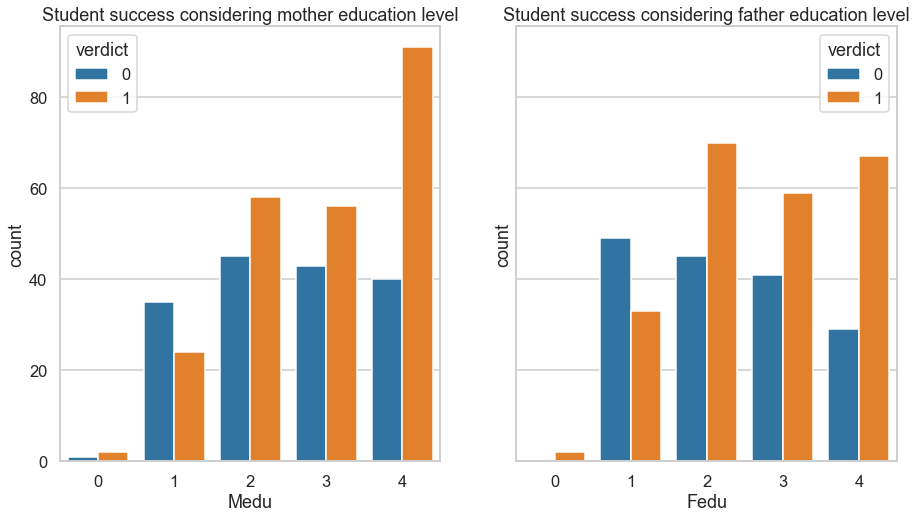

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8),sharey=True)

# Medu
sns.countplot(ax=axes[0], data = df, x='Medu', hue='verdict', palette = colors)
axes[0].set_title('Student success considering mother education level')

# Fedu
sns.countplot(ax=axes[1], data = df, x='Fedu', hue='verdict', palette = colors)
axes[1].set_title('Student success considering father education level')

> ### Toujours, quand les parents ont un bon niveau d'études, (plus d'1) l'élève réussit. Ainsi, pour les parents bien éduqués, les élèves réussiront.

### `Avoir des parents enseignants augmente les chances de réussite ?`

In [58]:
df_teacher = df.query('Mjob=="teacher" | Fjob== "teacher"')
df_teacher.sample(3)

,school,sex,age,famsize,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,health,absences,G1,G2,G3,exam,verdict
242,GP,M,16,LE3,4,3,teacher,other,mother,1,1,3,0,6,0,0,2.000000,0
65,GP,F,16,LE3,4,3,teacher,services,mother,3,2,1,2,16,15,15,15.333333,1
42,GP,M,15,GT3,4,4,services,teacher,father,1,2,5,2,19,18,18,18.333333,1


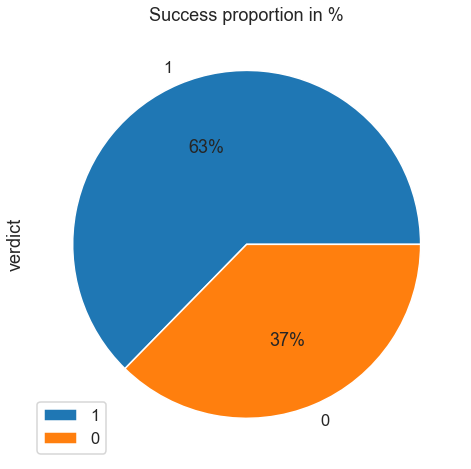

In [59]:
plt.figure(figsize=(10,8))
df_teacher.verdict.value_counts().plot(kind='pie', autopct='%.0f%%', colors = colors)
plt.title('Success proportion in %')
plt.legend()

In [60]:
df_teacher = df.query('Mjob=="teacher" & Fjob== "teacher"')
df_teacher.sample(3)

,school,sex,age,famsize,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,health,absences,G1,G2,G3,exam,verdict
139,GP,F,15,GT3,4,4,teacher,teacher,mother,2,1,5,0,16,16,15,15.666667,1
289,GP,M,18,LE3,4,4,teacher,teacher,mother,1,2,2,9,15,13,15,14.333333,1
299,GP,M,18,LE3,4,4,teacher,teacher,mother,1,1,1,5,16,15,16,15.666667,1


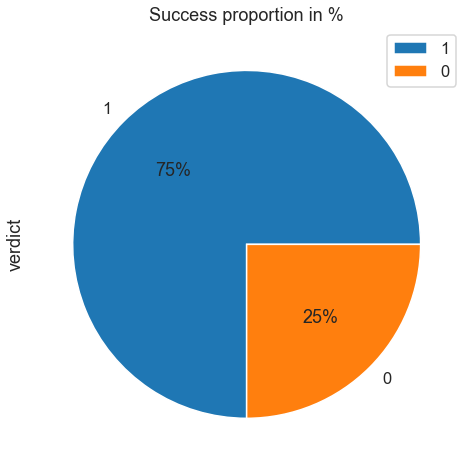

In [61]:
plt.figure(figsize=(10,8))
df_teacher.verdict.value_counts().plot(kind='pie', autopct='%.0f%%', colors = colors)
plt.title('Success proportion in %')
plt.legend()

> ### Oui, avoir un enseignant comme parent aide à mieux réussir. Si les deux parents sont enseignant vous aurez encore plus de chance de réussir

### `Influence du temps de trajet pour la réussite de l'étudiant`

Text(0.5, 1.0, 'Age influence to exam score')

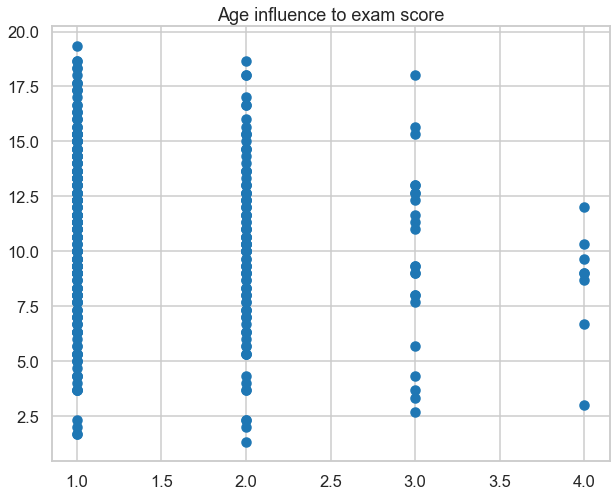

In [62]:
plt.figure(figsize=(10,8))
plt.scatter( x=df.traveltime, y=df.exam)
plt.title('Age influence to exam score')

In [63]:
df_travel_exam1 = pd.DataFrame([df.query('traveltime==1').exam.mean(),df.query('traveltime==2').exam.mean(),
                            df.query('traveltime==3').exam.mean(),df.query('traveltime==4').exam.mean(),
                            ],columns=['mscore'],index=[1,2,3,4])


df_travel_exam2 = pd.DataFrame([df.query('traveltime==1').exam.median(),df.query('traveltime==2').exam.median(),
                            df.query('traveltime==3').exam.median(),df.query('traveltime==4').exam.median(),
                            ],columns=['mscore'],index=[1,2,3,4])


Text(0.5, 0, 'Traveltime')

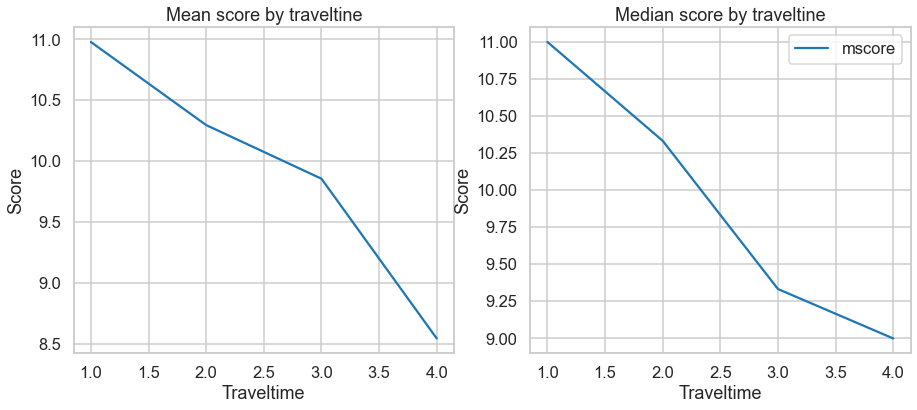

In [64]:
fig, axes =plt.subplots(1,2, figsize=([15,6]))

#mean
df_travel_exam1.mscore.plot(ax=axes[0])
axes[0].set_title('Mean score by traveltine')
axes[0].set_ylabel('Score')
axes[0].set_xlabel('Traveltime')

#median
df_travel_exam2.plot(ax=axes[1])
axes[1].set_title('Median score by traveltine')
axes[1].set_ylabel('Score')
axes[1].set_xlabel('Traveltime')

> ### On observe que le score se dégraisse avec le temps de trajet. Pour réussir, les étudiants doivent réduire le temps de trajet

<a id="5"></a>
# **<center><span style="color:#fd7b12;">Prediction </span></center>**

### Après avoir répondu aux questions, nous ne saurons pas créer un modèle qui puisse nous aider à prédire le verdict. Pour ce faire, nous supprimerons les variables de note et d'examen

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
import pickle

In [66]:
df.drop(['G1', 'G3','G3','exam',], axis =1, inplace=True)

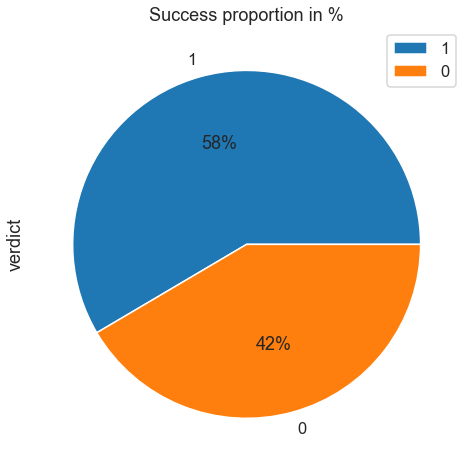

In [67]:
plt.figure(figsize=(10,8))
df.verdict.value_counts().plot(kind='pie', autopct='%.0f%%', colors = colors)
plt.title('Success proportion in %')
plt.legend()

### Nous allons égaliser les deux proportions pour ne pas biaiser notre étude

In [68]:
seed = 111
X = df.drop('verdict', axis=1)
y = df['verdict']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, 
                                                    random_state = seed, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, 
                                                    random_state = seed, stratify=y_test)

In [69]:
X2 = X_train
X2['verdict'] = y_train.values

In [70]:
minority = X2[X2.verdict == 0]
majority = X2[X2.verdict == 1]
minority_upsampled = resample(minority, replace=True, n_samples = len(majority))

In [71]:
upsampled = pd.concat([majority, minority_upsampled])

In [72]:
X_train = upsampled.drop(['verdict'], axis=1)
y_train = upsampled['verdict']

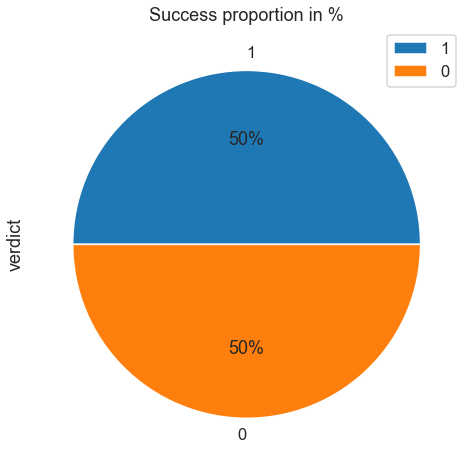

In [73]:
plt.figure(figsize=(10,8))
upsampled.verdict.value_counts().plot(kind='pie', autopct='%.0f%%', colors = colors)
plt.title('Success proportion in %')
plt.legend()

### Nous avons maintenant la même proportion, 50/50. Nous allons former deux modèles avec cela et choisir le meilleur.

In [74]:
from flaml import AutoML
model1 = AutoML()
model1.fit(X_train, y_train, task="classification",metric='log_loss',time_budget=300)

[flaml.automl: 08-02 12:05:12] {2105} INFO - task = classification
[flaml.automl: 08-02 12:05:12] {2107} INFO - Data split method: stratified
[flaml.automl: 08-02 12:05:12] {2111} INFO - Evaluation method: cv
[flaml.automl: 08-02 12:05:12] {2188} INFO - Minimizing error metric: log_loss
[flaml.automl: 08-02 12:05:12] {2281} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 08-02 12:05:12] {2567} INFO - iteration 0, current learner lgbm
[flaml.automl: 08-02 12:05:12] {2697} INFO - Estimated sufficient time budget=2421s. Estimated necessary time budget=59s.
[flaml.automl: 08-02 12:05:12] {2744} INFO -  at 0.7s,	estimator lgbm's best error=0.6117,	best estimator lgbm's best error=0.6117
[flaml.automl: 08-02 12:05:12] {2567} INFO - iteration 1, current learner lgbm
[flaml.automl: 08-02 12:05:12] {2744} INFO -  at 0.9s,	estimator lgbm's best error=0.6117,	best estimator lgbm's best error=0.6117
[flaml.autom

In [75]:
print('Best Algorithm :', model1.best_estimator)
print('Best setup :', model1.best_config)

Best Algorithm : rf
Best setup : {'n_estimators': 16, 'max_features': 0.761749893434741, 'max_leaves': 17, 'criterion': 'entropy'}


In [76]:
print(classification_report(y_train, model1.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00       139

    accuracy                           1.00       278
   macro avg       1.00      1.00      1.00       278
weighted avg       1.00      1.00      1.00       278



In [77]:
print(classification_report(y_val, model1.predict(X_val)))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        33
           1       0.96      0.93      0.95        46

    accuracy                           0.94        79
   macro avg       0.93      0.94      0.94        79
weighted avg       0.94      0.94      0.94        79



In [78]:
print(classification_report(y_test, model1.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        33
           1       0.90      1.00      0.95        46

    accuracy                           0.94        79
   macro avg       0.95      0.92      0.93        79
weighted avg       0.94      0.94      0.94        79



In [79]:
y_pred=model1.predict(X_test)

Text(0.5, 1.0, 'Confusion matrix')

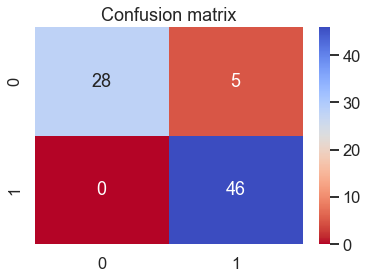

In [80]:
cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm1, annot=True, fmt="d",cmap='coolwarm_r')
plt.title('Confusion matrix')

### Pour notre deuxième modèle, nous avons

In [81]:
from flaml import AutoML
model2 = AutoML()
model2.fit(X_train, y_train, task="classification",metric='f1',time_budget=300)

[flaml.automl: 08-02 12:10:14] {2105} INFO - task = classification
[flaml.automl: 08-02 12:10:14] {2107} INFO - Data split method: stratified
[flaml.automl: 08-02 12:10:14] {2111} INFO - Evaluation method: cv
[flaml.automl: 08-02 12:10:14] {2188} INFO - Minimizing error metric: 1-f1
[flaml.automl: 08-02 12:10:14] {2281} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 08-02 12:10:14] {2567} INFO - iteration 0, current learner lgbm
[flaml.automl: 08-02 12:10:15] {2697} INFO - Estimated sufficient time budget=3891s. Estimated necessary time budget=96s.
[flaml.automl: 08-02 12:10:15] {2744} INFO -  at 0.5s,	estimator lgbm's best error=0.0596,	best estimator lgbm's best error=0.0596
[flaml.automl: 08-02 12:10:15] {2567} INFO - iteration 1, current learner lgbm
[flaml.automl: 08-02 12:10:15] {2744} INFO -  at 0.9s,	estimator lgbm's best error=0.0596,	best estimator lgbm's best error=0.0596
[flaml.automl: 0

In [82]:
print('Best Algorithm :', model2.best_estimator)
print('Best setup :', model2.best_config)

Best Algorithm : extra_tree
Best setup : {'n_estimators': 7, 'max_features': 1.0, 'max_leaves': 19, 'criterion': 'gini'}


In [83]:
print(classification_report(y_train, model2.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00       139

    accuracy                           1.00       278
   macro avg       1.00      1.00      1.00       278
weighted avg       1.00      1.00      1.00       278



In [84]:
print(classification_report(y_val, model2.predict(X_val)))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        33
           1       0.95      0.91      0.93        46

    accuracy                           0.92        79
   macro avg       0.92      0.93      0.92        79
weighted avg       0.93      0.92      0.92        79



In [85]:
print(classification_report(y_test, model2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.82      0.89        33
           1       0.88      0.98      0.93        46

    accuracy                           0.91        79
   macro avg       0.92      0.90      0.91        79
weighted avg       0.92      0.91      0.91        79



In [86]:
y_pred=model2.predict(X_test)

Text(0.5, 1.0, 'Confusion matrix')

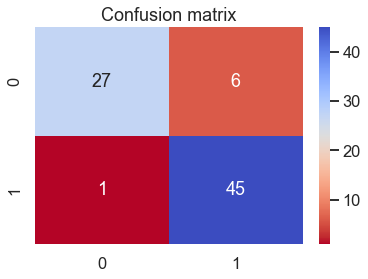

In [87]:
cm2 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm2, annot=True, fmt="d",cmap='coolwarm_r')
plt.title('Confusion matrix')

### Maintenant, nous allons comparer nos deux modèles pour choisir le meilleur prédicteur

In [88]:
score_1 = (f1_score(y_test, model1.predict(X_test))+f1_score(y_val, model1.predict(X_val)))/2
score_2 = (f1_score(y_test, model2.predict(X_test))+f1_score(y_val, model2.predict(X_val)))/2

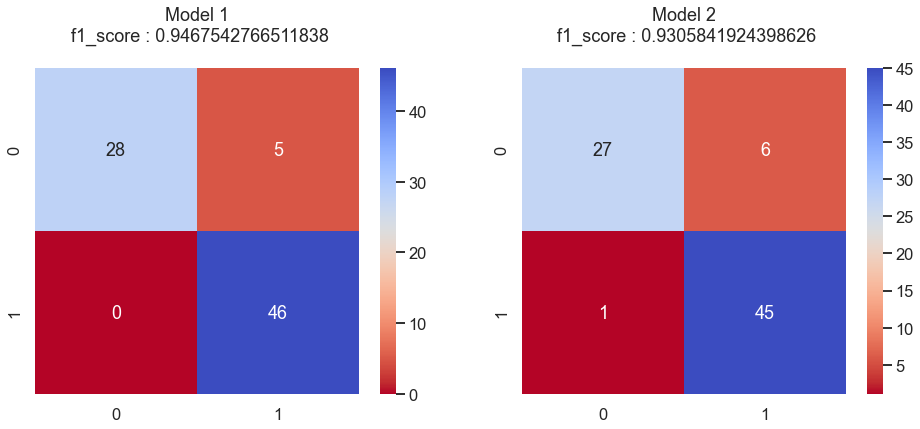

In [89]:
fig, axes =plt.subplots(1,2, figsize=([16,6]))

#model1
sns.heatmap(cm1, annot=True, fmt="d",cmap='coolwarm_r',ax = axes[0])
axes[0].set_title(f'Model 1\n f1_score : {score_1}\n')

#model2
sns.heatmap(cm2, annot=True, fmt="d",cmap='coolwarm_r',ax = axes[1])
axes[1].set_title(f'Model 2\n f1_score : {score_2}\n')
plt.show()

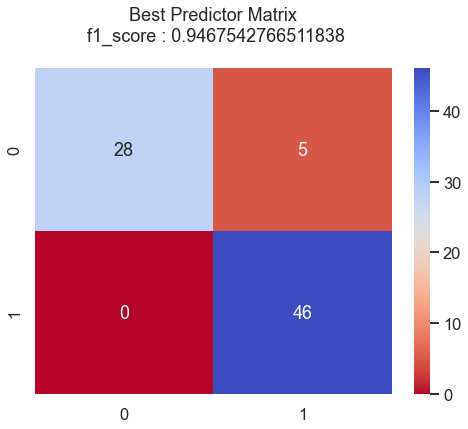

In [90]:
if score_1 > score_2:
    best_pred=model1.predict(X_test)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm1, annot=True, fmt="d",cmap='coolwarm_r')
    plt.title(f'Best Predictor Matrix\n f1_score : {score_1}\n')
else :
    best_pred=model2.predict(X_test)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm2, annot=True, fmt="d",cmap='coolwarm_r')
    plt.title(f'Best Predictor Matrix\n f1_score : {score_2}\n')

In [91]:
# Saving model to disk
pickle.dump(best_pred, open('model.pkl','wb'))

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="6"></a>
# **<center><span style="color:#fd7b12;">Conclusion </span></center>**

### `Les hommes ont-il plus de chances de réussir que les femmes ?`

> ### Notre analyse nous aide à dire que les hommes ont plus de chance de réussir que les femmes

### `Quel est l'impact de l'âge pour réussir ?`

> ### En vieillissant, les chances de succès diminuent

### `Le niveau d'instruction des parents influence-t-il la réussite de leur enfant ?`

> ### Pour les parents bien éduqués, l'enfant réussit

### `Avoir des parents enseignant augmente-t-il les chances de réussite ?`

> ### Oui, avoir un enseignant comme parent aide à mieux réussir. Si les deux parents sont prof on aura encore plus de chance de réussir

### `Le temps de trajet a-t-il influencé la réussite de l'élève ?`

> ### Le score se dégraisse avec le temps de parcours. DONC le temps de trajet réduit les chances de réussite

### `Prediction Models`

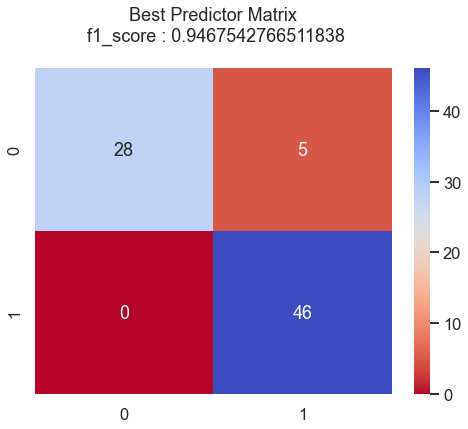

In [92]:
if score_1 > score_2:
    best_pred=model1.predict(X_test)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm1, annot=True, fmt="d",cmap='coolwarm_r')
    plt.title(f'Best Predictor Matrix\n f1_score : {score_1}\n')
else :
    best_pred=model2.predict(X_test)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm2, annot=True, fmt="d",cmap='coolwarm_r')
    plt.title(f'Best Predictor Matrix\n f1_score : {score_2}\n')

> ### Le meilleur prédicteur est enregistré dans notre fichier pkl.

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>